# Building A Handwritten Digits Classifier

In this project, we will use 

1. the unsupervised of K-neighbors clustering to identify the image by comparison to its nearest cluster;
2. the ability of adding hidden layers of neurons to a neural network to capture the non-linearity nature of handwritten digits.

We will train, test and improve deep neural networks for image classification.

We will be using the  load_digits() function from the scikit-learn library for a copy of the [hand-written digits dataset from UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).



In [0]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading of data

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
labels = pd.Series(digits['target'])
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

### Display of sample images

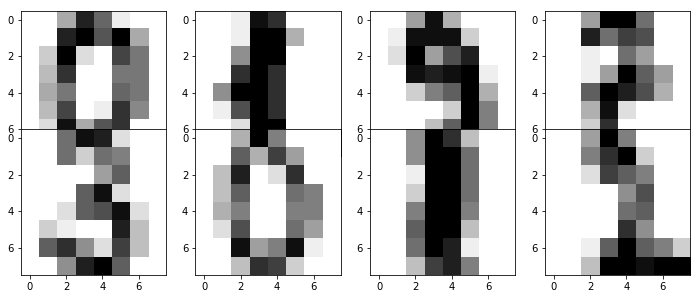

In [5]:
figure = plt.figure(figsize=(12,8))
ax1 = figure.add_subplot(141)
ax1.imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax2 = figure.add_subplot(142)
ax2.imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax3 = figure.add_subplot(143)
ax3.imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax4 = figure.add_subplot(144)
ax4.imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
ax5 = figure.add_subplot(245)
ax5.imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax6 = figure.add_subplot(246)
ax6.imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax7 = figure.add_subplot(247)
ax7.imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax8 = figure.add_subplot(248)
ax8.imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')


## K-Nearest Neighbor

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def train_knn(neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train_features, train_labels)
    return knn
  
def test_knn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy
  
def cross_validation(neighbors):
    accuracies = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        model = train_knn(neighbors, train_features, train_labels)
        accuracy = test_knn(model, test_features, test_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)
  
score = cross_validation(5)
score    

0.9738485412787089

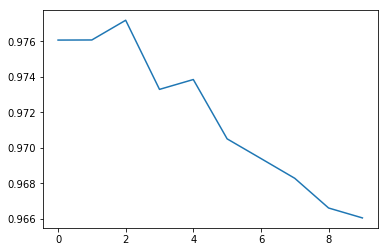

In [7]:
#Experiment with different k values
k_list = [x for x in range(10)]
k_accuracies = []

for k in k_list:
  acc = cross_validation(k+1)
  k_accuracies.append(acc)

plt.plot(k_list, k_accuracies)

In [8]:
score_optimal = cross_validation(2)
score_optimal

0.9760769708255742

The accuracy of the K-Nearest Neighbors algorithm peaked with two neighbors. The accuracy goes down further as we increase the number of neighbors.

## Neural Network

In [0]:
def train_nn(neurons, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=neurons)
    nn.fit(train_features, train_labels)
    return nn
  
def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy
  
def cross_validate_nn(neurons):
    accuracies = []
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        acc = test_nn(model, test_features, test_labels)
        accuracies.append(acc)
    return np.mean(accuracies)
    

### With One Hidden Layer

Text(0.5, 1.0, 'Mean Accuracy of Neural Network with One Hidden Layer')

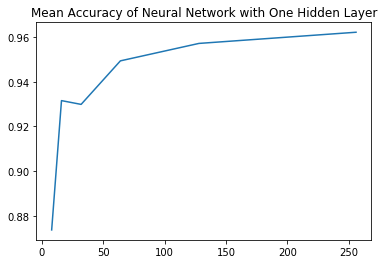

In [10]:
import warnings
warnings.filterwarnings('ignore')

neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
nn_one_accuracies = []

for n in neurons:
  accuracy = cross_validate_nn(n)
  nn_one_accuracies.append(accuracy)
  
  
plt.plot([x[0] for x in neurons], nn_one_accuracies)
plt.title("Mean Accuracy of Neural Network with One Hidden Layer")
  

In [11]:
nn_one_accuracies

[0.8737057728119181,
 0.9315518311607697,
 0.9298634388578522,
 0.949338919925512,
 0.9571384233395406,
 0.9621384233395405]

As we add more neurons to the layer, the accuracy improved. However, the accuracy is slightly less than the K-Nearest Neighbor algorithm. There is no advantage in using this model over the K-Nearest Neighbor algorithm.

### With Two Hidden Layers

We will from the graph above that the performance of the network began to increase at 64 neurons.

Text(0.5, 1.0, 'Mean Accuracy of Neural Network with Two Hidden Layers')

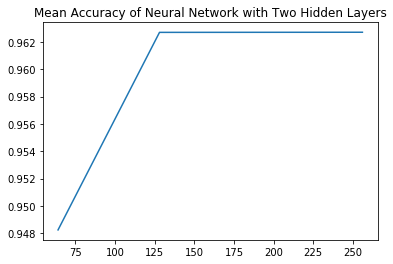

In [12]:

neurons_two = [(64, 64), (128, 128), (256,256)]
nn_two_accuracies = []

for n in neurons_two:
  accuracy = cross_validate_nn(n)
  nn_two_accuracies.append(accuracy)
  
  
plt.plot([x[0] for x in neurons_two], nn_two_accuracies)
plt.title("Mean Accuracy of Neural Network with Two Hidden Layers")



In [13]:
nn_two_accuracies

[0.9482402234636871, 0.9626970825574176, 0.9627063935443824]

This model is still under-performing compared to the K-Nearest Neighbor algorithm. Like the model with one hidden layer, the model with two hidden layers improved with an increase in neurons.

### With Three Hidder Layers

Text(0.5, 1.0, 'Mean Accuracy of Neural Network with Three Hidden Layers')

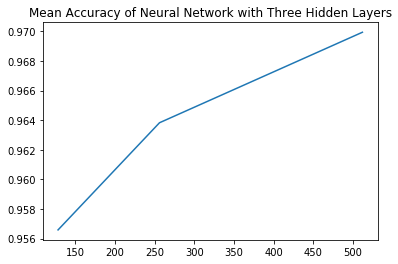

In [14]:
neurons_three = [(128, 128, 128), (256,256, 256), (512,512,512)]
nn_three_accuracies = []

for n in neurons_three:
  accuracy = cross_validate_nn(n)
  nn_three_accuracies.append(accuracy)
  
  
plt.plot([x[0] for x in neurons_three], nn_three_accuracies)
plt.title("Mean Accuracy of Neural Network with Three Hidden Layers")

In [15]:
nn_three_accuracies

[0.9565828677839849, 0.963826815642458, 0.9699441340782122]

# Conclusion

Based on the findings above, the accuracy of the neural networks increased with increases in hidden layers and neurons. However, K-Nearest Neighbor still outperformed the Neural Network model for this dataset.